# Introduction to Predictive Modelling and Regression Models
Algorithms and techniques seen so far have been focusing on **understanding the data** in different ways. We have seen methods to **summarize the data**, **study the relationship between variables**, including **cause-effect** relationships, **infer properties of the population which the observed data follow**, **study the internal structure of data**, its **density**, and perform **automated feature extraction with Principal Component Analysis**.

We will now look at data analysis from another perspective, the one of **predictive modelling**. The main goal of predictive modelling is to **build models which can make be used to make predictions on unseen data**. Predictive modelling is a broad field of data analysis, which is very overlapped with **machine learning**. 

It is worth mentioning that **predictive modelling is a shift in thinking with respect to the approaches seen so far**. For instance, we have seen how a **linear regressor attempts to predict $y$ from $x$**. This is a form of predictive modelling, but the goal so far has been to understand the relationship between $x$ and $y$, rather than making accurate predictions. Indeed, we have focused on **interpreting the coefficients** and making **hypothesis tests to check if our conclusions would extend to the population as well**. We have also seen how a **simpler model with inferior predictive abilities can sometimes be preferred to a more complex model due to its interpretability**.

The goal of predictive modelling is to **create data models that can support decision making**. Examples of uses of such models are:
* Determining the probability of a given patient **developing a given pathology from a blood test**;
* Determining if a given bank transaction is **a fraudulent one** (anomaly detection);
* Predicting the **future value of a company stock**;
* Estimating the **energy produced by a solar plant based on weather forecast**;
* Predict whether an **autonomous vehicle should turn left or right given sensor readings and an RGB image observation of the scene**.
* Detect the **presence of people from surveillance cameras**.

In these cases, we aim to obtain **accurate systems**, but we are less interested in their interpretability. Indeed, while being able to interpret such models is certainly a plus, we will often **prefer more complex but accurate models** even if we loose the ability to interpret them.

## Problem Formulation
We will give a general formulation of predictive modelling problems. Later, we will see instantiations of this formulation to specific predictive modeling problems. 

Let $\mathcal{X}$ and $\mathcal{Y}$ be two spaces of objects. We can see them as the sample spaces of two random variables $X$ and $Y$, with $x \in \mathcal{X}$ and $y \in \mathcal{Y}$ being two realizations of the random variables: $X=x$ and $Y=y$. The goal of predictive modeling is to find a function:

$$h : \mathcal{X} \to \mathcal{Y}$$

which outputs an object $y \in \mathcal{Y}$, given an object $x \in \mathcal{X}$. We often use the symbol $y$ to refer to the **true value of $Y=y$ associated to the observation $X=x$**, while **$\hat y$ will represent the prediction obtained using function $h$**:

$$\hat y = h(x)$$

The true value $y$ is often called **ground truth**. The function $h$ is usually a **data model** and often referred to as **an hypothesis**.

### Example 1
As a simple example, we can imagine $\mathcal{X}=\Re^m$ and $\mathcal{Y}=\{0,1\}$, with $\mathbf{x} \in \Re^m$ being a numerical vector representing the results of different blood tests made on a given subject, while $y \in \{0,1\}$ being a response variable indicating whether the given subject has ($1$) or does not have ($0$) a given disease.

Finding an appropriate function $h$ will allow us to predict if a given subject has a given disease from the blood test $\mathbf{x}$:

$$\hat y = h(\mathbf{x})$$

If we obtain $\hat y = 1$, then we will assume that the given person has the disease. While this example is very abstract, we will later see algorithms which assign a specific form to $h$.

### Example 2
We want to build a **spam filter** which decides whether a given email is spam or not. In this case, we can consider $\mathcal{X}$ as the **set of all possible emails** and $\mathcal{Y}=\{0,1\}$, with $1$ indicating spam and $0$ indicating non-spam. Let $f$ be a function counting the number of orthographical mistakes of a given email $x \in \mathcal{X}$:

$$f : \mathcal{X} \to R^+$$

We can determine if a given email $x$ is spam or not by **counting the number of mistakes and checking whether this number exceeds a pre-determined threshold $\theta$**. We can hence define our function $h$ as follows:

$$h(x) = \begin{cases} 1 & \text{ if } f(x)>\theta \\ 0 & \text{otherwise} \end{cases}$$

As we will later see, this is a **trivial example of a parametric classifier with one parameter**.

## Statistical Learning
While there are different ways to define the function $h$, the model is often obtained following an approach called **statistical learning**. According to the statistical learning approach, we will assume to have at our disposal a TRaining set (TR) of $N$ examples:

$$\text{TR}=\{(x_i,y_i)\}_{i=1}^N$$

where $x_i \in \mathcal{X}$ is the input object and $y_i \in \mathcal{Y}$ is the corresponding response that we aim to obtain with $h(x_i)$. **The term "training set" is borrowed from the machine learning terminology, where a model is "trained" on a given set of data to improve its performance in tackling a given task**.

More specifically, we will assume that **the examples are independent and identically distributed (i.i.d.)**, following the joint probability $P(X,Y)$:

$$(x,y) \sim P(X,Y)$$

The i.i.d. hypothesis is reasonable and, as we will see later, very useful. Moreover, the assumption that the data follows the joint probability, **allows us to reason in probabilistic terms, modeling the uncertainty in predictions**. Hence, the predicted values will be realization of a random variable following the **conditional distribution** P(y|x):

$$\hat y = h(x) \text{, with } \hat y \sim P(y|x)$$

To find the appropriate function $h$, we will define (depending on the problem) a **non-negative, real-valued loss (or cost) function** $L(\hat y, y)$ which measures **the loss, or cost** of predicting $\hat y$ when the true value is $y$. If the prediction $\hat{y}$ is very similar to the real value $y$, then we will obtain a small cost (or loss value) for $L(\hat y, y)$. In practice, the form of $L$ will vary depending on the problem and model at hand.

We will define **the risk $R(h)$ of a given hypothesis function $h$** as the **expected loss value under the joint probability distribution**:

$$R(h) = E_{(x,y) \sim P(X,Y)}[L(h(x),y)]$$

**Statistical learning aims to find the optimal $h^*$ from a fixed class of functions $\mathcal{H}$ by solving the following optimization problem**:

$$h^* = \underset{h \in \mathcal{H}}{\mathrm{arg\ min}}\ R(h)$$

Borrowing from the machine learning terminology, we will say that a model as a **large capacity if the number of the associated functions $\mathcal{H}$ is large**.

### Empirical Risk Minimization
In general, the risk $R(h)$ cannot be computed because the joint distribution $P(X,Y)$ is unknown. However, **by the law of large numbers**, we can estimate it empirically using the training set TR:

$$R_{emp}(h) = \frac{1}{N}\sum_{i=1}^N L(h(x_i),y_i)$$

The **empirical risk minimization principle states that the we should choose a hypothesis $\hat h$ from the class of hypothesis functions $\mathcal{H}$ which minimizes the empirical risk**:

$$\hat h = \underset{h \in \mathcal{H}}{\mathrm{arg\ min}}\ R_{emp}(h)$$

We thus define a **learning algorithm** (i.e., an algorithm used to "learn" the model $\hat h$ from the training set TR) which solves the above defined optimization problem.

### Supervised vs Unsupervised Learning
In the machine learning terminology, predictive models as just defined are also referred to as **supervised learning algorithms**, where the world "supervised" indicates that we are given input objects $x$ and expected (or desired) out values $y$. This is in contrast with **unsupervised** algorithms, in which we are only given the $x$ values. Examples of such algorithms are the Principal Component Analysis and Clustering Algorithms.

## Evaluating the Performance of a Predictive Model
Once we choose a model $\hat h$ minimizing the empirical risk computed on the training set, we need to **evaluate the performance of the model**. This is a fundamental step, as we want to know **how well will the model do "in the wild", beyond the training set**.

### Overfitting
One may think that a model minimizing the empirical risk will be the best possible one. However, especially **when the training set is not large enough (as compared to the complexity of the model) or not representative enough of the joint probability distribution $P(X,Y)$**, the estimation of the empirical risk may be limited. As an example, consider the following model:

$$\hat h(x) = y \text{ s.t. } (x,y) \in \text{TR}$$

The hypothesis $\hat h$ defined above will lead to an empirical risk equal to $0$ as long as the loss function is defined in such a way that $L(y,y)=0$. Indeed:

$$R_{emp}(\hat (x)) = \frac{1}{N}\sum_{i=1}^N L(y,y) = 0$$

However, the function above will not be defined for any value:

$$x' \in \mathcal{X} \text{ s.t. } (x',y) \notin \text{ TR } \forall y \in \mathcal{Y}$$

Since **we expect the training set to be a sample from the distribution $P(X,Y)$, we expect such values $x'$ to exist** (otherwise the training *is* the population, which is in general not true).

The example above is an extreme case of a phenomenon called **overfitting**, which happens when **a given hypothesis achieves a low error on the training set, but the solution is not general enough to obtain similar performance (i.e., a similar risk) on data not belonging to the training set**.

The phenomenon of overfitting is often related to the **capacity of the model**. A model with a **large capacity** can represent very complex functions $h$ and result in overfitting, while a model is a **small capacity** can represent relatively simple functions $h$, making overfitting harder, but possibly resulting in an **underfitting model**, i.e., a model which is too simple, and as a result cannot reach a low empirical risk.

This is best seen with the simple regression example below:

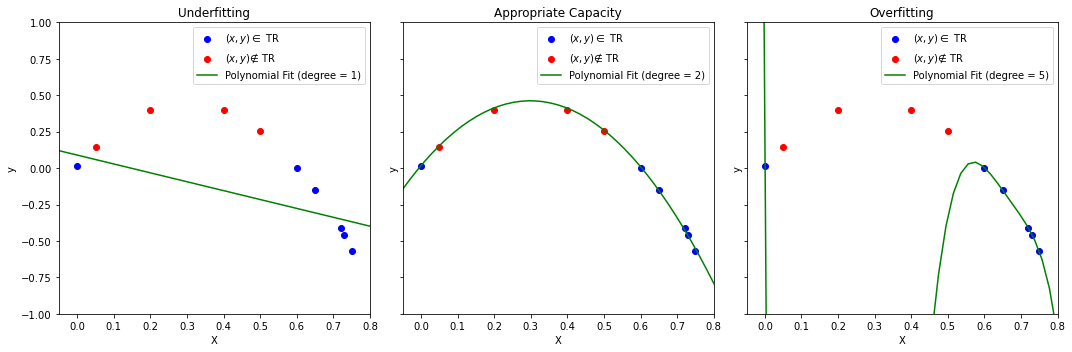

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate random data
np.random.seed(0)
n=10
#X_train = np.random.rand(n, 1)
X_train = np.array([0,0.05,0.2,0.4,0.5,0.6,0.65,0.72,0.73,0.75]).reshape(-1,1)
idx_train = np.array([0,5,6,7,8,9])
idx_test = np.array([1,2,3,4])
X_test = X_train[idx_test]
X_train = X_train[idx_train]
#y = 1 + 2 * X - 5*X**3 + 3*X**4 + np.random.randn(n, 1)
f = lambda x: 3*x - 5*x**2 + np.random.randn(x.shape[0],1)*0.01
y_train = f(X_train)
y_test = f(X_test)

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up subplot
degrees = [1, 2, 5]
_, axs = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharex=True, sharey=True)

txt = ["Underfitting", "Appropriate Capacity", "Overfitting"]

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    #print(model.score(X_poly_train, y_train))

    # Plot training data
    axs[i].scatter(X_train, y_train, color='blue', label='$(x,y) \\in$ TR')

    # Plot test data
    axs[i].scatter(X_test, y_test, color='red', label='$(x,y) \\notin$ TR')

    # Plot polynomial fit
    x_range = np.linspace(-1, 1, 100).reshape(-1, 1)
    x_range_poly = poly_features.transform(x_range)
    y_pred = model.predict(x_range_poly)
    axs[i].plot(x_range, y_pred, color='green', label=f'Polynomial Fit (degree = {degree})')

    axs[i].set_title(txt[i])
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('y')
    plt.xlim([-0.05,0.8])
    plt.ylim(-1,1)
    axs[i].legend()

plt.tight_layout()
plt.show()


The example shows the fit of three polynomial regression models of different degrees (the first one is degree 1, which corresponds to a linear regressor). As can be noted:

* A lower degree polynomial (e.g., a line - left) will lead to **underfitting**. In this case, the model is too simple to model the data well, so the empirical risk will be large;
* A higher degree polynomial (right) will minimize the empirical risk but find a complex model which will not describe well data which has not been seen at training time. This is a case of **overfitting**. The model is trying to model the idiosyncrasies of the training set (which can be noisy) finding a solution which will work only on the data at hand;
* An appropriate degree (center) will lead to a model with an appropriate capacity. The empirical risk is minimized and the solution also works with unseen data.

> Note that this is another instance of the **bias-variance** tradeoff. Complex models (right) have a large variance and a large bias: small variations of the training set are modeled and can lead to wrong solutions. Models that are too simple  (left) have a low variance, but can still have a large bias (the model is too simple and the solution is not good). Choosing an appropriate capacity (in this case by choosing an appropriate polynomial degree) leads to a good trade-off between variance and bias.

**Regularization and Bias-Variance tradeoff**
In practice, there are different ways to reduce the model capacity. In the example above, the degree of the polynomial has been used as an hyperparameter to reduce the capacity of the model. A different approach would be to use regularization techniques. The plot below shows the result of fitting a polynomial regressor on the same data when Ridge regression is used:

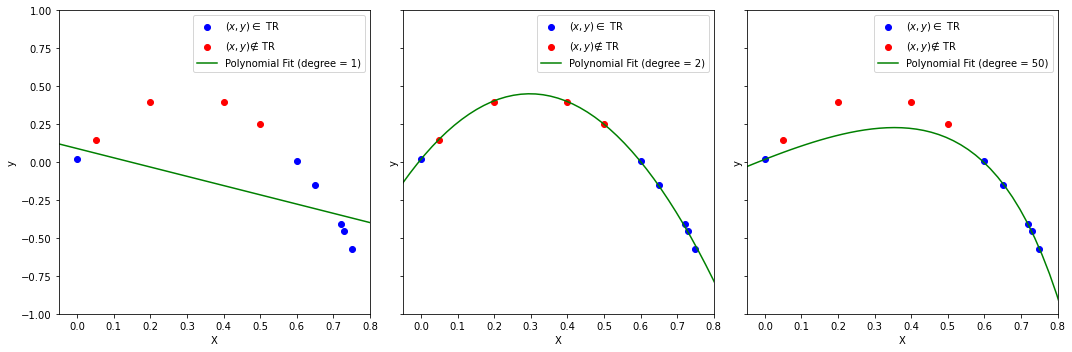

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Generate random data
np.random.seed(0)
n=10
#X_train = np.random.rand(n, 1)
X_train = np.array([0,0.05,0.2,0.4,0.5,0.6,0.65,0.72,0.73,0.75]).reshape(-1,1)
idx_train = np.array([0,5,6,7,8,9])
idx_test = np.array([1,2,3,4])
X_test = X_train[idx_test]
X_train = X_train[idx_train]
#y = 1 + 2 * X - 5*X**3 + 3*X**4 + np.random.randn(n, 1)
f = lambda x: 3*x - 5*x**2 + np.random.randn(x.shape[0],1)*0.01
y_train = f(X_train)
y_test = f(X_test)

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up subplot
degrees = [1, 2, 50]
_, axs = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharex=True, sharey=True)

txt = ["Underfitting", "Appropriate Capacity", "Overfitting"]

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Fit polynomial regression model
    model = Ridge(alpha=0.0001)
    model.fit(X_poly_train, y_train)

    #print(model.score(X_poly_train, y_train))

    # Plot training data
    axs[i].scatter(X_train, y_train, color='blue', label='$(x,y) \\in$ TR')

    # Plot test data
    axs[i].scatter(X_test, y_test, color='red', label='$(x,y) \\notin$ TR')

    # Plot polynomial fit
    x_range = np.linspace(-1, 1, 100).reshape(-1, 1)
    x_range_poly = poly_features.transform(x_range)
    y_pred = model.predict(x_range_poly)
    axs[i].plot(x_range, y_pred, color='green', label=f'Polynomial Fit (degree = {degree})')

    #axs[i].set_title(txt[i])
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('y')
    plt.xlim([-0.05,0.8])
    plt.ylim(-1,1)
    axs[i].legend()

plt.tight_layout()
plt.show()


Note that even a polynomial of degree equal to $50$ (right) achieves reasonable results now.

### Generalization and Cross-Validation
The example above has shown how it is possible to obtain models that work well on the training data but do not generalize to unseen data, while ideally we would want models which work well on the test data as well. We call the ability of the model to obtain a similar error (e.g., the empirical risk)  on both the training set and unseen data **generalization**.

To measure the ability of a model to generalize, we could just take the model and use it "**in the wild**". However, since we want our tests to be repeatable, we instead resort to a series of techniques which **consist in using a part of our dataset as a training set and different part of the dataset as a test set**. These techniques are generally referred to as **cross validation**. In the following, we see the main approaches to cross validation.

However, before to proceed, we should point out that, while we could evaluate the performance of a model with the **empirical risk**, in practice, it is common to use **performance measures** (the higher the better) or **error measures** (the lower the better) which may be different from the **loss function chosen to train the algorithm**. This is due to the fact that loss functions often need to have some properties to facilitate learning, so they can represent an **approximation of or a deviation from our true objective measure of performance**. We will see more in details the main performance measures later, but for the moment we will note that we will evaluate models using a given performance measure:

$$p(\hat Y, Y) : \mathcal{Y}^N \times \mathcal{Y}^N \to \Re$$

where $Y=\{y_i | (x_i,y_i) \in S \}_{i=1}^N$ is a set of ground truth values from a set of data $S$ and $\hat Y = \{h(x_i) | (x_i,y_i) \in S \}_{i=1}^N$ is the set of corresponding predictions. Note that, given the definition above, the empirical risk can be seen as a performance measure, but we need not restrict to the empirical risk to evaluate predictive models.

#### Holdout Validation or Single Split
The simplest form of cross-validation is the holdout test. In this case, the initial set of data is split into two different sets: a training set, which will be used to optimize the model (e.g., with empirical risk minimization) and a test set, which is used to evaluate the performance of the model. The act of optimizing the model on the training set is often called **training**, while the act of evaluating the performance of the model on the test set is called **testing**. This approach **pretends that the test data is not available at training time and only uses it to evaluate performance**. 

The **rule number one** when using this technique is **to avoid in any way to choose any characteristic of the model based on the training data**. Indeed, if we did so, we could end up in some form of unmeasurable overfitting. To make sure that both the training and test set are i.i.d., before the split, the data is **randomly shuffled**.

Also, since training data is usually precious and datasets are often not large enough, it is common to split the data asymmetrically, choosing $70-80\%$ of the data for training and $20-30\%$ of the data for testing.

The figure below illustrates the splitting process:

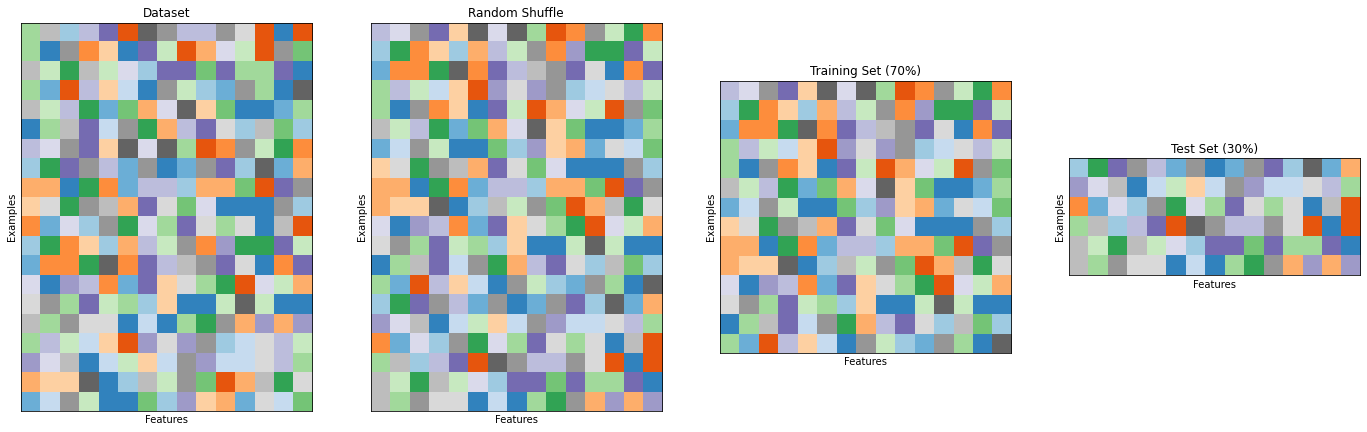

In [162]:
from matplotlib import pyplot as plt
import numpy as np

np.random.seed(42)
n = 20
d = 15
data = np.random.randint(0,100,(n,d))
idx = np.random.permutation(n)
data_shuffled = data[idx]

train = data_shuffled[:int(n*0.7)]
test = data_shuffled[int(n*0.7):]

_, axs = plt.subplots(nrows=1, ncols=4, figsize=(24,8))
axs[0].imshow(data, cmap='tab20c', interpolation='none')
#axs[0].axis('off')
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Examples')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title('Dataset')

axs[1].imshow(data_shuffled, cmap='tab20c', interpolation='none')
axs[1].set_xlabel('Features')
axs[1].set_ylabel('Examples')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title('Random Shuffle')

axs[2].imshow(train, cmap='tab20c', interpolation='none')
axs[2].set_title('Training Set (70%)')
axs[2].set_xlabel('Features')
axs[2].set_ylabel('Examples')
axs[2].set_xticks([])
axs[2].set_yticks([])

axs[3].imshow(test, cmap='tab20c', interpolation='none')
axs[3].set_title('Test Set (30%)')
axs[3].set_xlabel('Features')
axs[3].set_ylabel('Examples')
axs[3].set_xticks([])
axs[3].set_yticks([])
plt.show()

#### K-Fold Cross-Validation
When the dataset is very small, we may not want to sacrifice a part of it for testing only as this may lead to a biased model. Also, we should note that a small test set could lead to a biased estimation of the model performance. In these cases, rather than randomly splitting the data into two parts, we randomly split it into $K$ different parts, which will be called **folds**.

We then perform training and testing $K$ times, each time using fold $i$ as the test set, and the remaining folds as the training set. The final model performance is obtained by averaging the performance scores computed in each iteration. Note that the obtained performance is unbiased, as each number in the final average is computed on data which has not been seen during training.

The figure below illustrates the case of a 4-fold cross-validation.

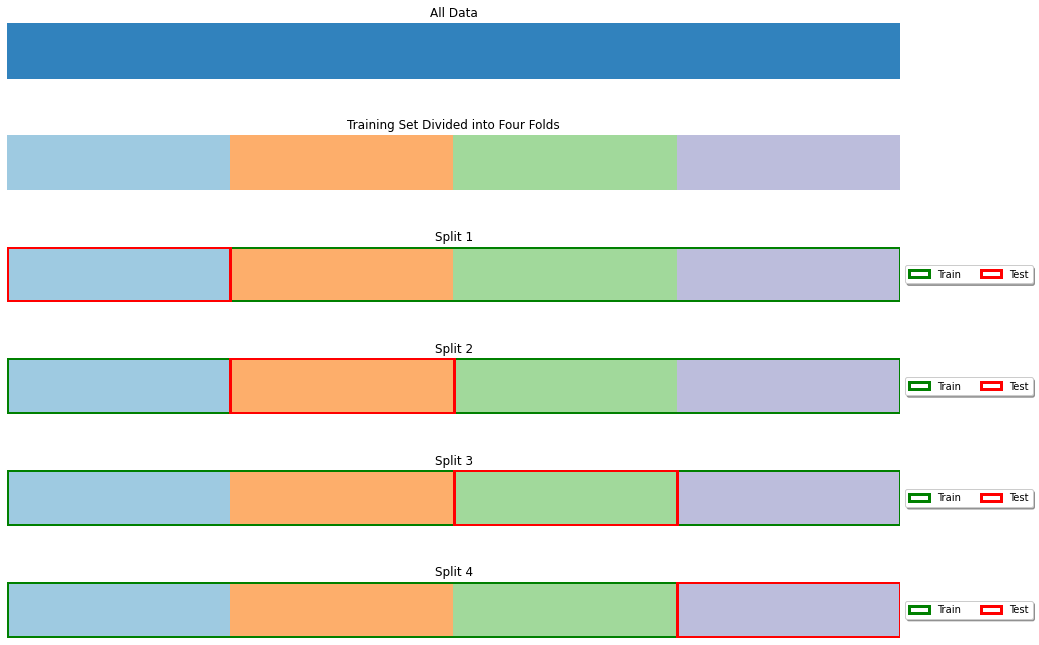

In [200]:
data=np.zeros((1,20))

train_test = data.copy()
train_test[:,16:]=7
train_test = train_test[:,:16]

crossval = train_test.copy()[:,:16]
for c in range(4):
    crossval[:,c*4:(c+1)*4]=c*2+1


_, axs = plt.subplots(nrows=6, ncols=1, figsize=(16,12), sharex=True)

axs[0].imshow(train_test, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[0].axis('off')
axs[0].set_title('All Data')

axs[1].axis('off')
axs[1].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[1].set_title('Training Set Divided into Four Folds')

axs[2].axis('off')
axs[2].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[2].add_patch(plt.Rectangle((3.5,-0.5),12,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[2].add_patch(plt.Rectangle((-0.5,-0.5),4,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Test'))
axs[2].set_title('Split 1')

axs[3].axis('off')
axs[3].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[3].add_patch(plt.Rectangle((-0.5,-0.5),4,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[3].add_patch(plt.Rectangle((7.5,-0.5),8,0.98, edgecolor='green', facecolor='none',linewidth=3))
axs[3].add_patch(plt.Rectangle((3.5,-0.5),4,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Test'))
axs[3].set_title('Split 2')

axs[4].axis('off')
axs[4].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[4].add_patch(plt.Rectangle((-0.5,-0.5),8,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[4].add_patch(plt.Rectangle((11.5,-0.5),4,0.98, edgecolor='green', facecolor='none',linewidth=3))
axs[4].add_patch(plt.Rectangle((7.5,-0.5),4,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Test'))
axs[4].set_title('Split 3')

axs[5].axis('off')
axs[5].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[5].add_patch(plt.Rectangle((-0.5,-0.5),12,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[5].add_patch(plt.Rectangle((11.5,-0.5),4,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Test'))
axs[5].set_title('Split 4')

axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

axs[3].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

axs[4].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)


axs[5].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

plt.show()

The K-Fold cross validation has the advantage of allowing to validate the model without throwing away a significant part of the data, but it is practically feasible only when the training procedure is not too computationally expensive. Indeed, if training a model takes one week, a K-Fold validation will typically require four weeks.

#### Leave-One-Out Cross-Validation
In leave-one-out cross-validation, the validation stage is performed in $N$ iterations, where $N$ is the number of elements in the dataset. At the $i^{th}$ iteration, the model is trained on all data points except $(x_i,y_i)$ and tested on $(x_i,y_i)$. The final performance is obtained by averaging the performance scores obtained at each iterations. Note that this is the same as K-Fold cross-validation with $K=N$. The figure below illustrates the process:

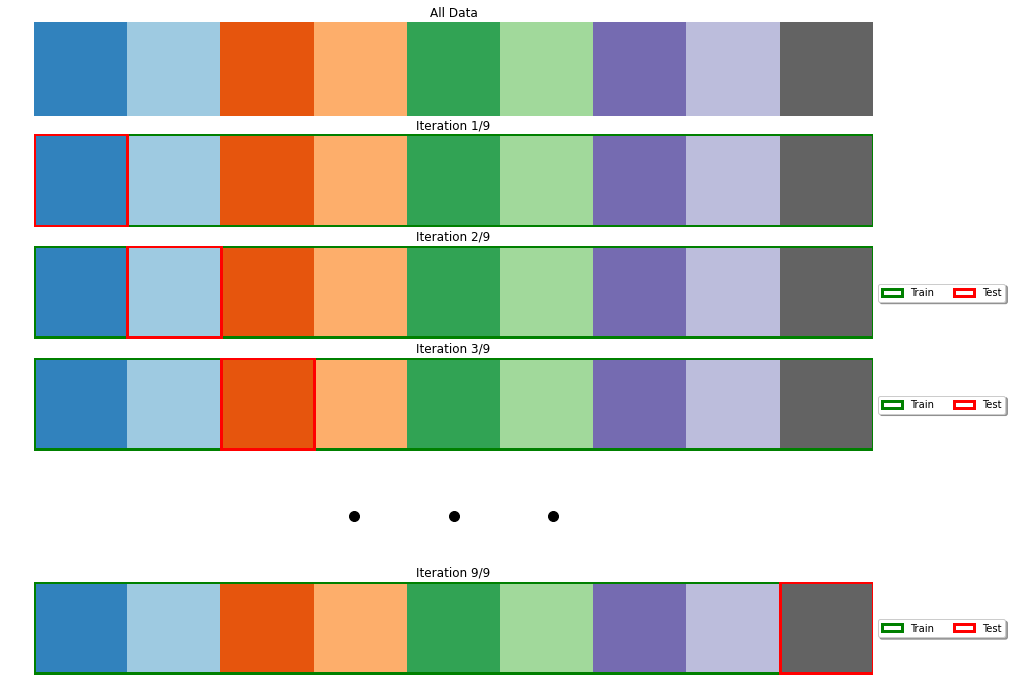

In [242]:
data=np.zeros((1,9))

train_test = data.copy()

crossval = train_test.copy()[:,:16]
for c in range(16):
    crossval[:,c:(c+1)]=c


_, axs = plt.subplots(nrows=6, ncols=1, figsize=(16,12), sharex=True)

axs[0].axis('off')
axs[0].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[0].set_title('All Data')

axs[1].axis('off')
axs[1].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[1].add_patch(plt.Rectangle((-0.5,-0.5),9,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[1].add_patch(plt.Rectangle((-0.5,-0.5),1,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Test'))
axs[1].set_title('Iteration 1/9')

axs[2].axis('off')
axs[2].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[2].add_patch(plt.Rectangle((-0.5,-0.5),9,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[2].add_patch(plt.Rectangle((0.5,-0.5),1,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Test'))
axs[2].set_title('Iteration 2/9')

axs[3].axis('off')
axs[3].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[3].add_patch(plt.Rectangle((-0.5,-0.5),9,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[3].add_patch(plt.Rectangle((1.5,-0.5),1,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Test'))
axs[3].set_title('Iteration 3/9')

axs[4].axis('off')
axs[4].plot(np.array([3,4,5]),np.array([0,0,0]),'k.', markersize=20)

axs[5].axis('off')
axs[5].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[5].add_patch(plt.Rectangle((-0.5,-0.5),8,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[5].add_patch(plt.Rectangle((7.5,-0.5),1,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Test'))
axs[5].set_title('Iteration 9/9')

axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

axs[3].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)


axs[5].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

plt.show()

This approach is useful when the dataset is extremely small, but, similarly to K-Fold cross-validation, it can increase the computation time by a large margin.

## Model Selection and Hyperparmeter Optimization
Many algorithms have some parameters which are not explicitly part of the final model $h$, but they need to be set in order to solve the optimization problem. **For example, in a ridge or lasso regressor, the parameter $\lambda$ is used to control the amount of regularization during the learning process, however, the final parameter is not part of the model and is not automatically found during the optimization process**.

Hyperparameters are usually found using grid searches: we train models using different values of the hyperparamters and choose the model which performs best. However, **caution should be taken when hyperparameters are selected with grid search**.

Recall that **we are not allowed to make any choice on the final model using the test set**. Indeed, if we did so, we may incur in a form of overfitting which we would not be able to measure. For instance, we can choose a given parameter which works well only for that specific test set. How can we be sure that performance will be good when new data is analyzed?

To avoid this problem, we should work with three different sets of data: a **training set**, a **validation set**, and a **test set**. We will use the training set to train the model, the validation set to choose the hyperparameters and the test set to test the final performance. This is done by training different models on the test set, choosing the hyperparamter values leading to best values on the validation set, and then re-training the model on the training set (or on the union of training and validation set) to final test on the test set.

The most common scheme is to use a fixed split with a $60:20:20$ ratio, as shown in the following:

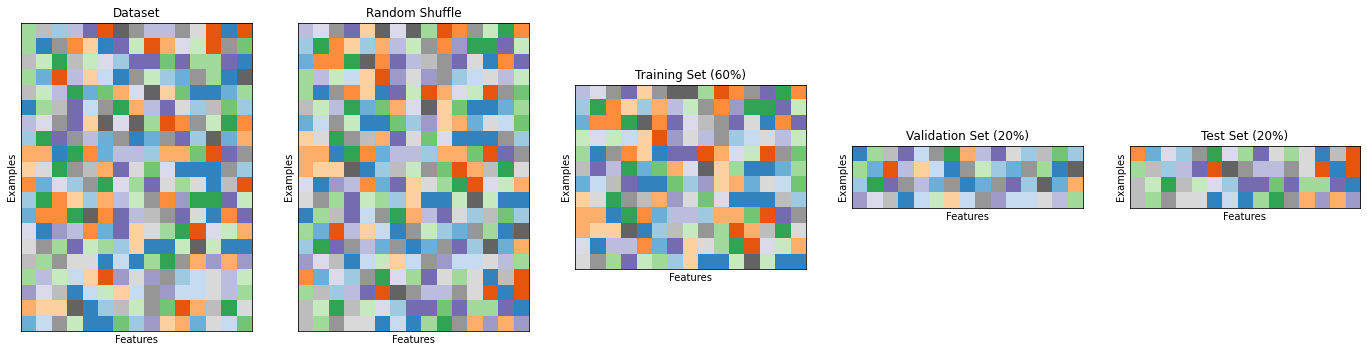

In [244]:
from matplotlib import pyplot as plt
import numpy as np

np.random.seed(42)
n = 20
d = 15
data = np.random.randint(0,100,(n,d))
idx = np.random.permutation(n)
data_shuffled = data[idx]

train = data_shuffled[:int(n*0.6)]
val = data_shuffled[int(n*0.6):int(n*0.8)]
test = data_shuffled[int(n*0.8):]

_, axs = plt.subplots(nrows=1, ncols=5, figsize=(24,8))
axs[0].imshow(data, cmap='tab20c', interpolation='none')
#axs[0].axis('off')
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Examples')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title('Dataset')

axs[1].imshow(data_shuffled, cmap='tab20c', interpolation='none')
axs[1].set_xlabel('Features')
axs[1].set_ylabel('Examples')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title('Random Shuffle')

axs[2].imshow(train, cmap='tab20c', interpolation='none')
axs[2].set_title('Training Set (60%)')
axs[2].set_xlabel('Features')
axs[2].set_ylabel('Examples')
axs[2].set_xticks([])
axs[2].set_yticks([])

axs[3].imshow(val, cmap='tab20c', interpolation='none')
axs[3].set_title('Validation Set (20%)')
axs[3].set_xlabel('Features')
axs[3].set_ylabel('Examples')
axs[3].set_xticks([])
axs[3].set_yticks([])

axs[4].imshow(test, cmap='tab20c', interpolation='none')
axs[4].set_title('Test Set (20%)')
axs[4].set_xlabel('Features')
axs[4].set_ylabel('Examples')
axs[4].set_xticks([])
axs[4].set_yticks([])
plt.show()

However, other combinations are possible. An approach which often used when the dataset is small is a follows:
* The dataset is split into a training and test set;
* Hyperparameters are optimized using cross-validation on the training set - this consists in executing different cross-validations with different hyperparameter values - then the parameters achieving the best performance are chosen;
* Once the best hyperparameters are found, the model is re-trained on the full training set and tested on the test set.

This is illustrated in the following figure:

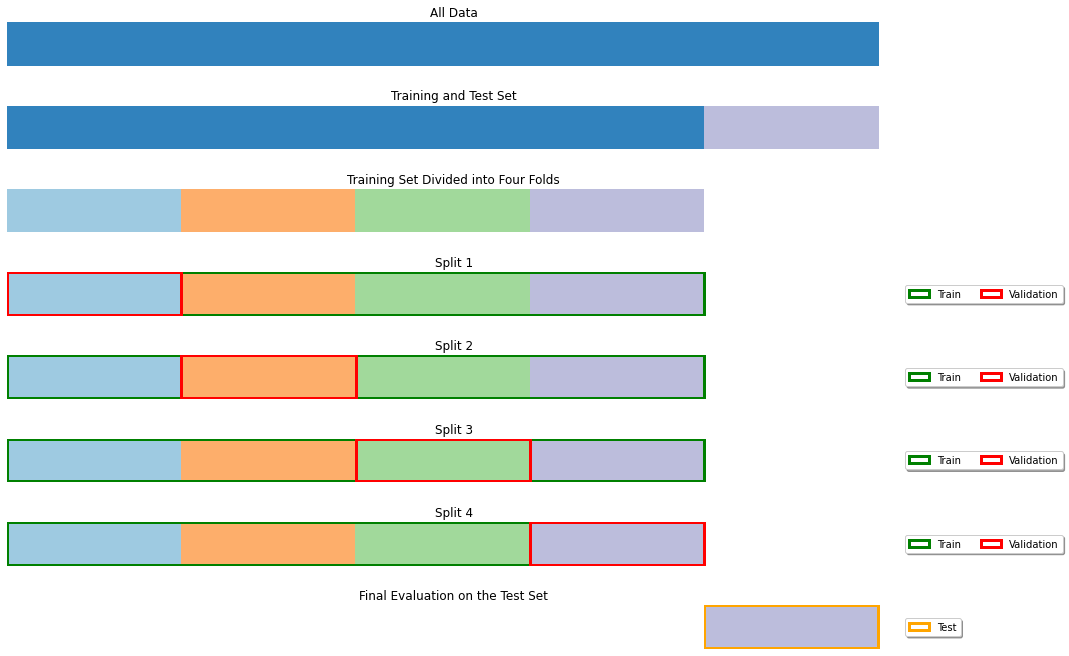

In [255]:
data=np.zeros((1,20))

train_test = data.copy()
train_test[:,16:]=7

crossval = train_test.copy()[:,:16]
for c in range(4):
    crossval[:,c*4:(c+1)*4]=c*2+1


_, axs = plt.subplots(nrows=8, ncols=1, figsize=(16,12), sharex=True)
axs[0].imshow(data, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[0].axis('off')
axs[0].set_title('All Data')

axs[0].set_xlim([-0.5,20])

axs[1].imshow(train_test, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[1].axis('off')
axs[1].set_title('Training and Test Set')

axs[2].axis('off')
axs[2].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[2].set_title('Training Set Divided into Four Folds')

axs[3].axis('off')
axs[3].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[3].add_patch(plt.Rectangle((-0.5,-0.5),16,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[3].add_patch(plt.Rectangle((-0.5,-0.5),4,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Validation'))
axs[3].set_title('Split 1')

axs[4].axis('off')
axs[4].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[4].add_patch(plt.Rectangle((-0.5,-0.5),16,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[4].add_patch(plt.Rectangle((3.5,-0.5),4,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Validation'))
axs[4].set_title('Split 2')

axs[5].axis('off')
axs[5].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[5].add_patch(plt.Rectangle((-0.5,-0.5),16,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[5].add_patch(plt.Rectangle((7.5,-0.5),4,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Validation'))
axs[5].set_title('Split 3')

axs[6].axis('off')
axs[6].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[6].add_patch(plt.Rectangle((-0.5,-0.5),16,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[6].add_patch(plt.Rectangle((11.5,-0.5),4,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Validation'))
axs[6].set_title('Split 4')

axs[7].axis('off')
axs[7].imshow(train_test, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[7].add_patch(plt.Rectangle((15.5,-0.5),4,0.98, edgecolor='orange', facecolor='none',linewidth=3, label='Test'))
axs[7].add_patch(plt.Rectangle((-0.5,-0.5),16,1, facecolor='white',linewidth=3))
axs[7].set_title('Final Evaluation on the Test Set')


axs[3].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

axs[4].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)


axs[5].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

axs[6].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

axs[7].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

plt.show()


Again, if the dataset is large enough and the training procedure is computationally expensive, it is common to use a fixed split as illustrated above.

The `scikit-learn` library allows to easily perform hyperparameter search using cross-validation for different algorithms.

More in general, these techniques can be used to compare different models and select the best performing one.

## Regression Predictive Models
We will now investigate an important family of predictive models: regression models. While we have already seen regression models as approaches to understand relationships within the data, in this context we are interested in defining good hypothesis functions $\hat h$ able to predict continuous values $\hat y$ from continuous inputs $x$. We can see the defined hypothesis function $\hat h$ as **an approximation of the true function $f$ generating $y$ from $x$: $y=f(x)$**. We will say that we are tackling a **regression problem** whenever the hypothesis function takes the form:

$$h:\Re^{n} \rightarrow \Re^{m}$$

Note that we have seen the case in which $n=m=1$ (simple regression) and the case in which $n>1, m=1$ (multiple regression). When both $n>1, m>1$, both the inputs and outputs of the regression model will be vectors of continuous values. We will see how linear regression models can be easily generalized to work in this case as well, but for the moment we will consider the form above as the general form of a regression model.

### Evaluation Measures
As noted, independently from the employed loss functions, we need evaluation measures to assess the performance of the trained models. Common evaluation measures for regression problems are discussed in the following.

#### Mean Squared Error (MSE)

Consider a ground truth label $\mathbf{y} \in \mathfrak{R}^{m}$ and a
predicted label  $\widehat{\mathbf{y}} \in \mathfrak{R}^{m}$. Since both
values are m-dimensional vectors, a natural way to measure if
 $\widehat{\mathbf{y}}$ is a good approximation of $\mathbf{y}$ is to
simply measure their Euclidean distance:

$$\left\| \widehat{\mathbf{y}} - \mathbf{y} \right\|_{2} = \sqrt{\sum_{i = 1}^{m}\left( {\widehat{y}}_{i} - y_{i} \right)^{2}}$$

In practice, **we often use the squared Euclidean distance to penalize
more large errors**:

$$error\left( \widehat{\mathbf{y}},\mathbf{y} \right) = \left\| \widehat{\mathbf{y}} - \mathbf{y} \right\|_{2}^{2} = \sum_{i = 1}^{m}\left( {\widehat{y}}_{i} - y_{i} \right)^{2}$$

We can compute the average error over the whole test set to obtain a
performance estimator, which is usually called Mean Squared Error (MSE):

$$MSE\left( Y_{TE},{\widehat{Y}}_{TE} \right) = \frac{1}{|TE|}\sum_{j = 1}^{|TE|}\left\| {\widehat{\mathbf{y}}}^{(j)} - \mathbf{y}^{(j)} \right\|_{2}^{2}$$

Where $TE$ denotes the TEst set.

This performance measure is an **error measure**. A good
regressor will obtain a **small error.**

Note that the MSE on the test set is equal to the RSS divided by the number of test data points $|TE|$.

#### Root Mean Squared Error (RMSE)

The unit of measure of the MSE is the squared unit of measure of the
dependent variable (target value). In practice, if $y$ is measured in
meters, then the MSE is measures in square meters. This is not very
intuitive. To obtain an error which can be measured in meters, we can
take the squared root of the MSE and obtain the Root Mean Square Error
(RMSE):

$$RMSE\left( Y_{TE},{\widehat{Y}}_{TE} \right) = \sqrt{\frac{1}{|TE|}\sum_{j = 1}^{|TE|}\left\| {\widehat{\mathbf{y}}}^{(j)} - \mathbf{y}^{(j)} \right\|_{2}^{2}}$$

#### Mean Absolute Error (MAE)

*If the target values are scalars* (hence $m = 1$), another possible
measure which has the same unit of measurement as the target variable is
the MAE, which is simply the average of the absolute errors:

$$MAE\left( Y,\widehat{Y} \right) = \frac{1}{|TE|}\sum_{i}^{}{|y_{i} - \widehat{y_{i}}|}$$

The main difference between the RMSE/MSE and MAE, is that RMSE/MSE tend
to give less importance to small errors, while giving more importance to
large errors. This comes from the observation that the squared of a
number smaller than one is even smaller than the original number,
whereas the squared of a large number is even larger. On the contrary,
MAE is often more intuitive (it is the average error we make when
estimating y).


### Linear Regression as a Predictive Model learned with Empirical Risk Minimization
We can see linear regression as a form of predictive modeling. Note that, **when looking at the linear regressor as a predictive model, we are more interested in its accuracy than in its interpretability**. In this context:

* We will assume $\mathcal{X}= \Re^n$, $\mathcal{Y}= \Re$
* The hypothesis function will take the form:

$$h(\mathbf{x}) = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n$$

* We will call our dataset the **training set**;
* We will define our loss function as the error function: $L(h(x),y) = (h(x)-y)^2$;

In this case the empirical risk is defined as follows:

$$R_{emp} = \frac{1}{N} \sum_{i=1}^N (h(x)-y)^2 = \frac{1}{N} RSS$$

Note that, since:

$$\hat h = \underset{h \in \mathcal{H}}{\mathrm{arg\ min}}\ R_{emp}(h) = \underset{h \in \mathcal{H}}{\mathrm{arg\ min}}\ \frac{1}{N} \sum_{i=1}^N (h(x)-y)^2 = \underset{h \in \mathcal{H}}{\mathrm{arg\ min}}\ \frac{1}{N} RSS =  \underset{h \in \mathcal{H}}{\mathrm{arg\ min}}\ RSS$$

we can solve the optimization problem with **Ordinary Least Squares (OLS)** (the same method we used previously to minimize RSS).

From a **learning perspective**, solving the optimization problem $\hat h = \underset{h \in \mathcal{H}}{\mathrm{arg\ min}}\ R_{emp}(h)$ corresponds to **finding the optimal set of parameters $\mathbf{\beta}$ minimizing the empirical risk**, which corresponds to minimizing the Residual Sum of Squares, as previously defined.

It is worth to emphasize that we are now interested in minimizing the empirical risk as much as possible, even if the model loses interpretability. Hence, **we can normalize the data, use many variables, include interaction terms, use polynomial regression, regularize with lasso and ridge, as long as it improves the performance of the model**.


### Multivariate Linear Regression
We will now show how the same training algorithm can be used in the case of multivariate linear regression, in which
we want map vectors to vectors:

$$h:\Re^{n} \rightarrow \Re^{m}$$

Multivariate linear regression solves the problem by defining $m$
independent multiple regressors $h_{i}(\mathbf{x})$ which process the
same input $\mathbf{x}$, but are allowed to have different weights:

$$\begin{pmatrix}
y_{1} \\
\ldots \\
y_{m} \\
\end{pmatrix} = \begin{pmatrix}
h_{1}(\mathbf{x}) \\
\ldots \\
h_{m}(\mathbf{x}) \\
\end{pmatrix}$$

Each regressor $h_{i}$ has its own parameters and their optimizations
are carried out independently.

### Non-linear Regression
The consideration made above are valid also in the case of other regression algorithms which allow to go beyond the assumption of linearity. Common examples of non-linear regression models are models with interaction terms, quadratic models, and polynomial models. Other approaches to nonlinear regression such as neural networks exist, but they will not be covered in this course.

## Example Regression Problem

We will now see an example in which we try to address a regression problem. We will use all best practices to select the model with best performance. 

### California Housing Dataset
We'll use the California Housing dataset provided by the `scikit-learn` library. Let us load the data as a dataframe and have a look at the data description:

In [269]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
print(data['DESCR'])
data['data']

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


The dataset contains $8$ variables. The independent variable is `MedInc`, the average value of houses in a given suburb, while all other variables are independent. For our aims, we will treat the data as a matrix of numerical variables. We could easily convert the dataframe in this format, but scikit-learn allows to load the data directly in this format:

In [271]:
# let us load the data without passing as_frame=True
data = fetch_california_housing()
X = data.data # the features
y = data.target # the targets

print(X.shape, y.shape)

(20640, 8) (20640,)


### Data Splitting
We will split the dataset into a training, a validation and a test set using the `train_test_split` function:

In [299]:
from sklearn.model_selection import train_test_split
# We'll do a 60:20:20 split
val_prop = 0.2
test_prop = 0.2

# We'll split the data in two steps - first let's create a test set and a combined trainval set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_prop, random_state=42)

# We'll now split the combined trainval into train and val set with the chosen proportions
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=test_prop/(1-test_prop), random_state=42)

# Let us check shapes and proportions
print(X_train.shape, X_val.shape, X_test.shape)
print(X_train.shape[0]/X.shape[0], X_val.shape[0]/X.shape[0], X_test.shape[0]/X.shape[0])

(12384, 8) (4128, 8) (4128, 8)
0.6 0.2 0.2


The `train_test_split` function will split the data randomly. We are passing a fixed `random_state` to be able to replicate the results, but, in general, we should avoid that if we want the split to be truly random (though it is common to use random seeds for splitting in research). Note that, while the split is random, the function makes sure that the i-th element of the y variable corresponds to the i-th element of the X variable after the split.

We will now reason mainly on the validation set, comparing different models and parameter configurations. Once we are done with our explorations, we'll check the final results on the test set.

### Data Normalization
We'll start by normalizing the data with z-scoring. This will prove useful later when we use certain algorithms (e.g., regularization). Note that we have not normalized data before because we need to **make sure that even mean and standard deviation parameters are not computed on the validation or test set**. While this may seem a trivial detail, it is important to follow this rule as strictly as possible to avoid bias. We can normalize the data with the `StandardScaler` object:

In [300]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # tunes the internal parameters of the standard scaler

X_train = scaler.transform(X_train) # does not tune the parameters anymore
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Scikit-learn objects have a unified object-oriented interface. Each algorithm is an object (e.g., `StandardScaler`) with standard methods, such as:
 * A `fit` method to tune the internal parameters of the algorithm. In this case, it is a vector of means and a vector of standard deviations, but in the case of a linear regression it will be a vector of weights;
 * A `transform` method to transform the data. Note that in this stage no parameters are tuned, so we can safely apply this method to validation and test data. This method only applies to objects which transform the data, such as the standard scaler;
 * A `predict` method to obtain predictions. This applies only to predictive models, such as a linear regressor;
 * A `score` method to obtain a standard performance measure on the test or validation data. Also this only applies to predictive models.

We will see examples of the last two methods later.

### Linear Regressor

We will start by training a linear regressor. We will use scikit-learn's implementation which does not provide statistical details (e.g., p-values) but is optimized for predictive modeling. The train/test interface is the same as above:

In [302]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train) # this tunes the internal parameters of the model

# Let us print the model's parameters
print(linear_regressor.coef_) 
print(linear_regressor.intercept_)

[ 0.86025287  0.1200073  -0.28039183  0.31208687 -0.00957447 -0.02615781
 -0.88821331 -0.86190739]
2.0680774192504314


We can obtain predictions on the validation set using the `predict` method:

In [304]:
y_val_pred = linear_regressor.predict(X_val)
print(y_val_pred.shape)

(4128,)


The function returns a vector of $4128$ predictions, one for each example in the validation set. We can now evaluate the predictions using regression evaluation measures. We will use the standard implementation of the main evaluation measures as provided by scikit-learn:

In [305]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = mean_squared_error(y_val, y_val_pred, squared=False)

print(mae, mse, rmse)

0.533334644741504 0.5297481095803488 0.727837969317587


All evaluation measures in scikit-learn follow the `evaluation_measure(y_true, y_pred)` convention. Note that the target variable `MedInc` is measured in tens of thousands of dollars, so an MAE of about $0.5$ corresponds to an average error of about $5000$ dollars. This is not that bad if we consider the mean and standard deviation of targets:

In [309]:
y_train.mean(), y_train.std()

(2.068077419250646, 1.1509151433486544)

Each predictor in scikit-learn also provides a `score` method which takes as input the validation (or test) inputs and outputs and computes some standard evaluation measures. By default the linear regressor in scikit-learn returns the $R^2$ value:

In [313]:
linear_regressor.score(X_val, y_val)

0.6142000785497264

While we are mainly interested in the performance of the model on the validation set (and ultimately on those on the test set), it is still useful to assess the performance on the training set for model diagnostics. For instance, if we see a big discrepancy between training and validation errors, then we can imagine that some overfitting is going on:

In [311]:
y_train_pred = linear_regressor.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

print(mae_train, mse_train, rmse_train)

0.5266487515751342 0.5143795055231386 0.7172025554354492


We can see that, while there are some differences between training and test performance, those are minor, so we can deduce that there is no significant overfitting going on.

> We should note that we should **always expect a certain degree of overfitting, depending on the task, the data and the model**. When the difference between train and test error is large, and hence there is significant overfitting, we can try to reduce this effect with regularization techniques.

To better compare models, we will now store the results of our analyses in a dataframe:

In [318]:
import pandas as pd
california_housing_val_results = pd.DataFrame({
    'Method': ['Linear Regressor'],
    'Parameters': [''],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse]
})

california_housing_val_results

,Method,Parameters,MAE,MSE,RMSE
0,Linear Regressor,,0.533335,0.529748,0.727838


It is common to use the word "method" to refer to a predictive algorithm or pipeline.

### Non-Linear Regression
Let us now try to fit a non-linear regressor. We will use polynomial regression with different polynomial degrees. To do so, we will perform an explicit polynomial expansion of the features using the `PolynomialFeatures` object. For convenience, we will define a function performing training and validation and returning both training and validation performance:

In [327]:
from sklearn.preprocessing import PolynomialFeatures
def trainval_polynomial(degree):
    pf = PolynomialFeatures(degree)
    # While the model does not have any learnable parameters, the "fit" method here is used to compute the output number of features
    pf.fit(X_train)
    X_train_poly = pf.transform(X_train)
    X_val_poly = pf.transform(X_val)

    polyreg = LinearRegression() # a Polynomial regressor is simply a linear regressor using polynomial features
    polyreg.fit(X_train_poly, y_train)

    y_poly_train_pred = polyreg.predict(X_train_poly)
    y_poly_val_pred = polyreg.predict(X_val_poly)

    mae_train = mean_absolute_error(y_train, y_poly_train_pred)
    mse_train = mean_squared_error(y_train, y_poly_train_pred)
    rmse_train = mean_squared_error(y_train, y_poly_train_pred, squared=False)

    mae_val = mean_absolute_error(y_val, y_poly_val_pred)
    mse_val = mean_squared_error(y_val, y_poly_val_pred)
    rmse_val = mean_squared_error(y_val, y_poly_val_pred, squared=False)

    return mae_train, mse_train, rmse_train, mae_val, mse_val, rmse_val

Let us now see what happens with different degrees:

In [355]:
for d in range(1,4):
    print("DEGREE: {} \n      {:>8s} {:>8s} {:>8s}\nTRAIN {:8.2f} {:8.2f} {:8.2f} \nVAL   {:8.2f} {:8.2f} {:8.2f}\n\n".format(d,"MAE", "MSE", "RMSE", *trainval_polynomial(d)))

DEGREE: 1 
           MAE      MSE     RMSE
TRAIN     0.53     0.51     0.72 
VAL       0.53     0.53     0.73


DEGREE: 2 
           MAE      MSE     RMSE
TRAIN     0.46     0.42     0.65 
VAL       0.48     0.91     0.95


DEGREE: 3 
           MAE      MSE     RMSE
TRAIN     0.42     0.34     0.58 
VAL      23.48 2157650.15  1468.89




### Ridge Regularization
We can see that, as the polynomial gets larger, the effect of overfitting increases. We can try to reduce this effect with Ridge or Lasso regularization. We'll focus on degree $2$ and try to apply ridge regression to it. Since Ridge regression relies on a parameter, we will try some values of the regularization parameter $\alpha$ (as it is called by sklearn). Let us define a function for convenience:

In [425]:
from sklearn.linear_model import Ridge
def trainval_polynomial_ridge(degree, alpha):
    pf = PolynomialFeatures(degree)
    # While the model does not have any learnable parameters, the "fit" method here is used to compute the output number of features
    pf.fit(X_train)
    X_train_poly = pf.transform(X_train)
    X_val_poly = pf.transform(X_val)

    polyreg = Ridge(alpha=alpha) # a Polynomial regressor is simply a linear regressor using polynomial features
    polyreg.fit(X_train_poly, y_train)

    y_poly_train_pred = polyreg.predict(X_train_poly)
    y_poly_val_pred = polyreg.predict(X_val_poly)

    mae_train = mean_absolute_error(y_train, y_poly_train_pred)
    mse_train = mean_squared_error(y_train, y_poly_train_pred)
    rmse_train = mean_squared_error(y_train, y_poly_train_pred, squared=False)

    mae_val = mean_absolute_error(y_val, y_poly_val_pred)
    mse_val = mean_squared_error(y_val, y_poly_val_pred)
    rmse_val = mean_squared_error(y_val, y_poly_val_pred, squared=False)

    return mae_train, mse_train, rmse_train, mae_val, mse_val, rmse_val

Let us now see the results for different values of $\alpha$. $\alpha=0$ means no regularization:

In [426]:
print("RIDGE, DEGREE: 2")
for alpha in [0,100,200,300,400]:
    print("Alpha: {:0.2f} \n      {:>8s} {:>8s} {:>8s}\nTRAIN {:8.2f} {:8.2f} {:8.2f} \nVAL   {:8.2f} {:8.2f} {:8.2f}\n\n".format(alpha,"MAE", "MSE", "RMSE", *trainval_polynomial_ridge(2,alpha)))

RIDGE, DEGREE: 2
Alpha: 0.00 
           MAE      MSE     RMSE
TRAIN     0.46     0.42     0.65 
VAL       0.48     0.91     0.96


Alpha: 100.00 
           MAE      MSE     RMSE
TRAIN     0.47     0.43     0.66 
VAL       0.48     0.54     0.74


Alpha: 200.00 
           MAE      MSE     RMSE
TRAIN     0.48     0.44     0.67 
VAL       0.49     0.51     0.72


Alpha: 300.00 
           MAE      MSE     RMSE
TRAIN     0.49     0.46     0.68 
VAL       0.50     0.50     0.71


Alpha: 400.00 
           MAE      MSE     RMSE
TRAIN     0.50     0.47     0.68 
VAL       0.51     0.51     0.71




We can see how, as alpha increases, the error on the training set increases, while the error on the test set decreases. For $\alpha=300$ we obtained a slightly better result than our linear regressor: 

In [378]:
california_housing_val_results

,Method,Parameters,MAE,MSE,RMSE
0,Linear Regressor,,0.533335,0.529748,0.727838


Let us see if we can improve the results with a polynomial of degree 3:

In [391]:
print("RIDGE, DEGREE: 3")
for alpha in [0,1,10,20]:
    print("Alpha: {:0.2f} \n      {:>8s} {:>8s} {:>8s}\nTRAIN {:8.2f} {:8.2f} {:8.2f} \nVAL   {:8.2f} {:8.2f} {:8.2f}\n\n".format(alpha,"MAE", "MSE", "RMSE", *trainval_polynomial_ridge(3,alpha)))

DEGREE: 3
Alpha: 0.00 
           MAE      MSE     RMSE
TRAIN     0.42     0.34     0.58 
VAL      23.50 2162209.37  1470.45


Alpha: 1.00 
           MAE      MSE     RMSE
TRAIN     0.42     0.34     0.58 
VAL      15.59 934580.07   966.74


Alpha: 10.00 
           MAE      MSE     RMSE
TRAIN     0.42     0.34     0.59 
VAL       1.57  4867.65    69.77


Alpha: 20.00 
           MAE      MSE     RMSE
TRAIN     0.42     0.35     0.59 
VAL       1.78  6690.78    81.80




Let us add the results of Polynomial regression of degree 2 with and without regularization:

In [409]:
poly2 = trainval_polynomial_ridge(2,0)
poly2_ridge300 = trainval_polynomial_ridge(2,300)
california_housing_val_results = pd.concat([
    california_housing_val_results,
    pd.DataFrame({'Method':'Polynomial Regressor', 'Parameters': 'degree=2', 'MAE':poly2[-3], 'MSE':poly2[-2], 'RMSE':poly2[-1]}, index=[1]),
    pd.DataFrame({'Method':'Polynomial Ridge Regressor', 'Parameters': 'degree=2, alpha=300', 'MAE':poly2_ridge300[-3], 'MSE':poly2_ridge300[-2], 'RMSE':poly2_ridge300[-1]}, index=[2])
])
california_housing_val_results

,Method,Parameters,MAE,MSE,RMSE
0,Linear Regressor,,0.533335,0.529748,0.727838
1,Polynomial Regressor,degree=2,0.480448,0.912976,0.955498
2,Polynomial Ridge Regressor,"degree=2, alpha=300",0.499228,0.504155,0.710039


### Lasso Regression
Let us now try the same with Lasso regression:

In [412]:
from sklearn.linear_model import Lasso
def trainval_polynomial_lasso(degree, alpha):
    pf = PolynomialFeatures(degree)
    # While the model does not have any learnable parameters, the "fit" method here is used to compute the output number of features
    pf.fit(X_train)
    X_train_poly = pf.transform(X_train)
    X_val_poly = pf.transform(X_val)

    polyreg = Lasso(alpha=alpha) # a Polynomial regressor is simply a linear regressor using polynomial features
    polyreg.fit(X_train_poly, y_train)

    y_poly_train_pred = polyreg.predict(X_train_poly)
    y_poly_val_pred = polyreg.predict(X_val_poly)

    mae_train = mean_absolute_error(y_train, y_poly_train_pred)
    mse_train = mean_squared_error(y_train, y_poly_train_pred)
    rmse_train = mean_squared_error(y_train, y_poly_train_pred, squared=False)

    mae_val = mean_absolute_error(y_val, y_poly_val_pred)
    mse_val = mean_squared_error(y_val, y_poly_val_pred)
    rmse_val = mean_squared_error(y_val, y_poly_val_pred, squared=False)

    return mae_train, mse_train, rmse_train, mae_val, mse_val, rmse_val

In [424]:
print("LSSO, DEGREE: 2")
for alpha in [0.02,0.03,0.04,0.05, 0.06]:
    print("Alpha: {:0.2f} \n      {:>8s} {:>8s} {:>8s}\nTRAIN {:8.2f} {:8.2f} {:8.2f} \nVAL   {:8.2f} {:8.2f} {:8.2f}\n\n".format(alpha,"MAE", "MSE", "RMSE", *trainval_polynomial_lasso(2,alpha)))

LSSO, DEGREE: 2
Alpha: 0.02 
           MAE      MSE     RMSE
TRAIN     0.52     0.51     0.71 
VAL       0.54     1.19     1.09


Alpha: 0.03 
           MAE      MSE     RMSE
TRAIN     0.55     0.55     0.74 
VAL       0.55     0.59     0.77


Alpha: 0.04 
           MAE      MSE     RMSE
TRAIN     0.56     0.57     0.76 
VAL       0.57     0.59     0.77


Alpha: 0.05 
           MAE      MSE     RMSE
TRAIN     0.58     0.60     0.78 
VAL       0.58     0.61     0.78


Alpha: 0.06 
           MAE      MSE     RMSE
TRAIN     0.60     0.63     0.80 
VAL       0.60     0.64     0.80




Lasso regression does not seem to improve results. Let us put the results obtained for $\alpha=0.04$ to the dataframe:

In [428]:
poly2_lasso004 = trainval_polynomial_lasso(2,0.04)
california_housing_val_results = pd.concat([
    california_housing_val_results,
    pd.DataFrame({'Method':'Polynomial Lasso Regressor', 'Parameters': 'degree=2, alpha=0.04', 'MAE':poly2_lasso004[-3], 'MSE':poly2_lasso004[-2], 'RMSE':poly2_lasso004[-1]}, index=[3])
])
california_housing_val_results

,Method,Parameters,MAE,MSE,RMSE
0,Linear Regressor,,0.533335,0.529748,0.727838
1,Polynomial Regressor,degree=2,0.480448,0.912976,0.955498
2,Polynomial Ridge Regressor,"degree=2, alpha=300",0.499228,0.504155,0.710039
3,Polynomial Lasso Regressor,"degree=2, alpha=0.04",0.567318,0.590100,0.768180


### Grid Search

Polynomial regression and ridge regression have parameters to optimize. We have so far optimized them manually. However, in practice, it is common to perform a grid search. This consists in defining a grid of possible values to try and train/validate many models, to finally choose the one with best performance.

This can be done manually as shown in the following example:

In [438]:
def grid_search(alphas=range(200,400,25), degrees=range(5)):
    best_mse = np.inf
    for a in alphas:
        for d in degrees:
            print(f"Evaluating a={a} d={d} MSE=", end='')
            results = trainval_polynomial_ridge(d,a)
            mse = results[-2]
            print(f"{mse:0.2f}")
            if mse<best_mse:
                best_mse = mse
                best_alpha = a
                best_degree = d

    return best_mse, best_alpha, best_degree
grid_search()

Evaluating a=200 d=0 MSE=1.37
Evaluating a=200 d=1 MSE=0.53
Evaluating a=200 d=2 MSE=0.51
Evaluating a=200 d=3 MSE=8161.95
Evaluating a=200 d=4 MSE=10884172.40
Evaluating a=225 d=0 MSE=1.37
Evaluating a=225 d=1 MSE=0.53
Evaluating a=225 d=2 MSE=0.51
Evaluating a=225 d=3 MSE=6710.18
Evaluating a=225 d=4 MSE=7243991.68
Evaluating a=250 d=0 MSE=1.37
Evaluating a=250 d=1 MSE=0.53
Evaluating a=250 d=2 MSE=0.51
Evaluating a=250 d=3 MSE=5542.92
Evaluating a=250 d=4 MSE=4880680.92
Evaluating a=275 d=0 MSE=1.37
Evaluating a=275 d=1 MSE=0.53
Evaluating a=275 d=2 MSE=0.50
Evaluating a=275 d=3 MSE=4598.99
Evaluating a=275 d=4 MSE=3312886.74
Evaluating a=300 d=0 MSE=1.37
Evaluating a=300 d=1 MSE=0.54
Evaluating a=300 d=2 MSE=0.50
Evaluating a=300 d=3 MSE=3831.00
Evaluating a=300 d=4 MSE=2255901.13
Evaluating a=325 d=0 MSE=1.37
Evaluating a=325 d=1 MSE=0.54
Evaluating a=325 d=2 MSE=0.50
Evaluating a=325 d=3 MSE=3202.40
Evaluating a=325 d=4 MSE=1534556.72
Evaluating a=350 d=0 MSE=1.37
Evaluating a=35

(0.504155356305115, 300, 2)

Testing a range of values, we found that best results are obtained with degree equal to $2$ and $\alpha=300$.

### Scikit-Learn Pipelines
Often, a predictive model is obtained by stacking different components. For instance, in our example, a Polynomial regressor is obtained by following this pipeline:
* Data standardization;
* Polynomial feature expansion:
* Ridge regression.

While these steps can be carried out independently as seen before, scikit-learn offers the  powerful interface of `Pipelines` to automate this process. A pipeline stacks different components together and makes it convenient to change some of elements of the pipeline or to optimize its parameters. Let us define a pipeline as the one discussed above:

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('polynomial_expansion', PolynomialFeatures()),
    ('ridge_regression', Ridge())
])

To take full advantage of the pipeline, we will re-load the dataset and avoid applying the standard scaler manually:

In [ ]:
# let us load the data without passing as_frame=True
data = fetch_california_housing()
X = data.data # the features
y = data.target # the targets

# We'll do a 60:20:20 split
val_prop = 0.2
test_prop = 0.2

# We'll split the data in two steps - first let's create a test set and a combined trainval set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_prop, random_state=42)

# We'll now split the combined trainval into train and val set with the chosen proportions
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=test_prop/(1-test_prop), random_state=42)

# Let us check shapes and proportions
print(X_train.shape, X_val.shape, X_test.shape)
print(X_train.shape[0]/X.shape[0], X_val.shape[0]/X.shape[0], X_test.shape[0]/X.shape[0])

(12384, 8) (4128, 8) (4128, 8)
0.6 0.2 0.2


Our pipeline has two parameters that we need to set: the Ridge regressor's $\alpha$ and the degree of the polynomial. We can set these parameters as follows:

In [ ]:
# We use the notation "object__parameter" to identify parameter names
polynomial_regressor.set_params(polynomial_expansion__degree=2, ridge_regression__alpha=300)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial_expansion', PolynomialFeatures()),
                ('ridge_regression', Ridge(alpha=300))])

We can now fit and test the model as follows:

In [ ]:
polynomial_regressor.fit(X_train, y_train)
y_val_pred = polynomial_regressor.predict(X_val)

mean_absolute_error(y_val, y_val_pred), mean_squared_error(y_val, y_val_pred), mean_squared_error(y_val, y_val_pred, squared=False)

(0.4992282794518701, 0.504155356305115, 0.7100389822433096)

### Grid Search with Cross Validation
Scikit-learn offers a powerful interface to perform grid search with cross validation. In this case, rather than using a fixed training set, a K-Fold validation is performed for each parameter choice in order to find the best performing parameter combination. This is convenient when a validation set is not available. We will combine this approach with the pipelines to easily automate the search of optimal parameters:

In [543]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

gs = GridSearchCV(polynomial_regressor, param_grid={'polynomial_expansion__degree':range(0,5), 'ridge_regression__alpha':range(200,400,25)}, scoring=make_scorer(mean_squared_error,greater_is_better=False))

We will now fit the model on the union of training and validation set:

In [552]:
gs.fit(X_trainval, y_trainval)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_expansion',
                                        PolynomialFeatures(degree=0)),
                                       ('ridge_regression', Ridge(alpha=200))]),
             param_grid={'polynomial_expansion__degree': range(0, 5),
                         'ridge_regression__alpha': range(200, 400, 25)},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

Let us check the best parameters:

In [553]:
gs.best_params_

{'polynomial_expansion__degree': 2, 'ridge_regression__alpha': 250}

These are similar to the ones found with our previous grid search. We can now fit the final model on the training set and evaluate on the validation set:

In [555]:
polynomial_regressor.set_params(**gs.best_params_)
polynomial_regressor.fit(X_train, y_train)
y_val_pred = polynomial_regressor.predict(X_val)
mae, mse, rmse = mean_absolute_error(y_val, y_val_pred), mean_squared_error(y_val, y_val_pred), mean_squared_error(y_val, y_val_pred, squared=False)

print(mae, mse, rmse)

0.49556977845052963 0.506286626421441 0.711538211497767


Let us add this result to our dataframe:

In [557]:
california_housing_val_results = pd.concat([
    california_housing_val_results,
    pd.DataFrame({'Method':'Cross-Validated Polynomial Ridge Regressor', 'Parameters': 'degree=2, alpha=250', 'MAE':mae, 'MSE':mse, 'RMSE':rmse}, index=[4])
])
california_housing_val_results

,Method,Parameters,MAE,MSE,RMSE
0,Linear Regressor,,0.533335,0.529748,0.727838
1,Polynomial Regressor,degree=2,0.480448,0.912976,0.955498
2,Polynomial Ridge Regressor,"degree=2, alpha=300",0.499228,0.504155,0.710039
3,Polynomial Lasso Regressor,"degree=2, alpha=0.04",0.567318,0.590100,0.768180
4,Cross-Validated Polynomial Ridge Regressor,"degree=2, alpha=250",0.495570,0.506287,0.711538


### Other Regression Algorithms

Thanks to the unified interface of scikit-learn objects, we can easily train other algorithms even if we do not know how they work inside. Of course, to be able to optimize them in the most complex situations we will need to know how they work internally. The following code shows how to train a neural network (we will not see the algorithm formally):

In [562]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp_regression', MLPRegressor())
])

mlp_regressor.fit(X_train,y_train)
y_val_pred = mlp_regressor.predict(X_val)
mae, mse, rmse = mean_absolute_error(y_val, y_val_pred), mean_squared_error(y_val, y_val_pred), mean_squared_error(y_val, y_val_pred, squared=False)
mae, mse, rmse

/Users/furnari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.3802246120708036, 0.3067554686836898, 0.5538550971903119)

In [564]:
california_housing_val_results = pd.concat([
    california_housing_val_results,
    pd.DataFrame({'Method':'Neural Network', 'Parameters': '', 'MAE':mae, 'MSE':mse, 'RMSE':rmse}, index=[4])
])
california_housing_val_results

,Method,Parameters,MAE,MSE,RMSE
0,Linear Regressor,,0.533335,0.529748,0.727838
1,Polynomial Regressor,degree=2,0.480448,0.912976,0.955498
2,Polynomial Ridge Regressor,"degree=2, alpha=300",0.499228,0.504155,0.710039
3,Polynomial Lasso Regressor,"degree=2, alpha=0.04",0.567318,0.590100,0.768180
4,Cross-Validated Polynomial Ridge Regressor,"degree=2, alpha=250",0.495570,0.506287,0.711538
4,Neural Network,,0.380225,0.306755,0.553855


### Comparison and Model Selection
We can now compare the performance of the different models using the table:

In [573]:
california_housing_val_results

,Method,Parameters,MAE,MSE,RMSE
0,Linear Regressor,,0.533335,0.529748,0.727838
1,Polynomial Regressor,degree=2,0.480448,0.912976,0.955498
2,Polynomial Ridge Regressor,"degree=2, alpha=300",0.499228,0.504155,0.710039
3,Polynomial Lasso Regressor,"degree=2, alpha=0.04",0.567318,0.590100,0.768180
4,Cross-Validated Polynomial Ridge Regressor,"degree=2, alpha=250",0.495570,0.506287,0.711538
4,Neural Network,,0.380225,0.306755,0.553855


Alternatively, we can visualize the results graphically:

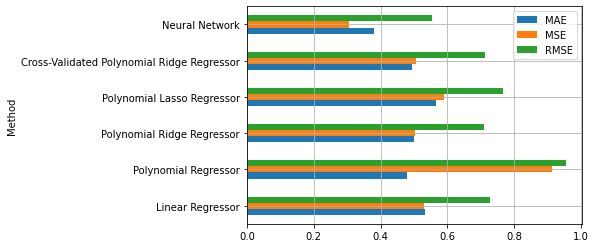

In [572]:
california_housing_val_results.plot.barh(x='Method')
plt.grid()
plt.show()

From the analysis of the validation performance, it is clear that the neural network performs better. We can now compute the final performance on the test set:

In [574]:
y_test_pred = mlp_regressor.predict(X_test)
mae, mse, rmse = mean_absolute_error(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred, squared=False)
mae, mse, rmse

(0.37814683358719486, 0.31599512987902556, 0.562134441107308)

## References
* https://en.wikipedia.org/wiki/Empirical_risk_minimization
* https://scikit-learn.org/stable/modules/cross_validation.html